In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *
import json
from time import time
import random

In [93]:
def plot_experiments(p, in_edges, dim, visualize, limit, results, delta=True, slope=False, title=''):
    limit = max([p, limit])

    for setting in results:
        if setting['in_edges'] != in_edges or setting['dim'] != dim or setting['p'] != p:
            continue

        if delta:
            plt.figure(figsize=(15, 15))
            ax1 = plt.subplot(2, 1, 1)
            ax2 = plt.subplot(2, 1, 2)
            ax1.set_xlim(0.5, limit+0.5)
            ax2.set_xlabel('p iteration')
            ax2.set_ylabel(visualize)
            ax2.set_title(f'{title}: true p = {p}, dimensions = {dim}, incoming edges = {in_edges} in last step')
            ax2.set_xlim(0.5, limit+0.5)
        else:
            plt.figure(figsize=(15, 8))
            ax1 = plt.subplot(1, 1, 1)
        
        ax1.set_xlabel('p iteration')
        ax1.set_ylabel(visualize)
        ax1.set_title(f'{title}: true p = {p}, dimensions = {dim}, incoming edges = {in_edges}')

        for experiment in setting['experiments']:
            true_graph = nx.from_dict_of_lists(experiment['true_graph'])
            iterations = [{'p_iter': i['p_iter'], 'bic': i['bic'], 'graph': nx.from_dict_of_lists(i['graph'], nx.DiGraph())} 
                          for i in experiment['iterations']]
            confusion, confusion_delta = evaluate_edge_deletion(true_graph, iterations, dim)

            if slope:
                x = confusion['p_iter'][:limit][1:]
                y = np.diff(confusion[visualize][:limit]) 
            else:  
                x = confusion['p_iter'][:limit]
                y = confusion[visualize][:limit]

            x_delta = confusion['p_iter'][:limit]
            y_delta = confusion_delta[visualize][:limit]

            ax1.plot(x, y, 'r-')
            if delta:    
                ax2.plot(x_delta, y_delta, 'r-')
                
        plt.show()
        break

In [94]:
dim = 3
in_edges = 2
p = 10
visualize = 'tn'
limit = 10

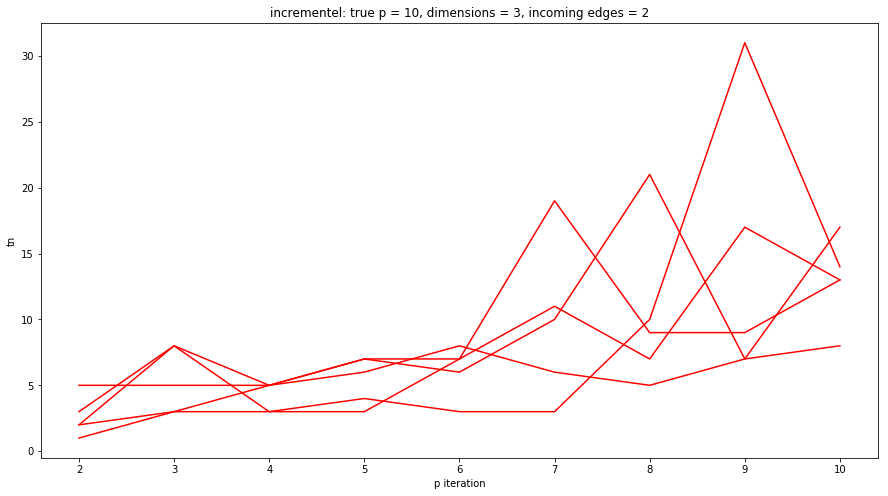

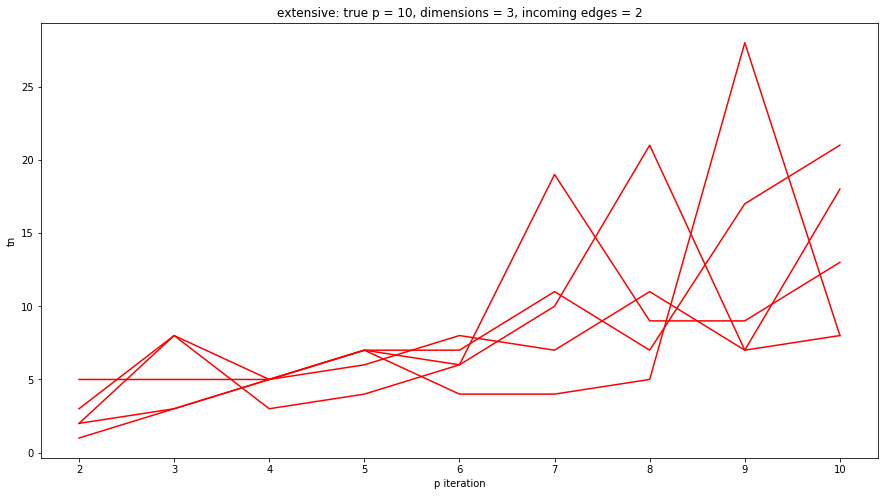

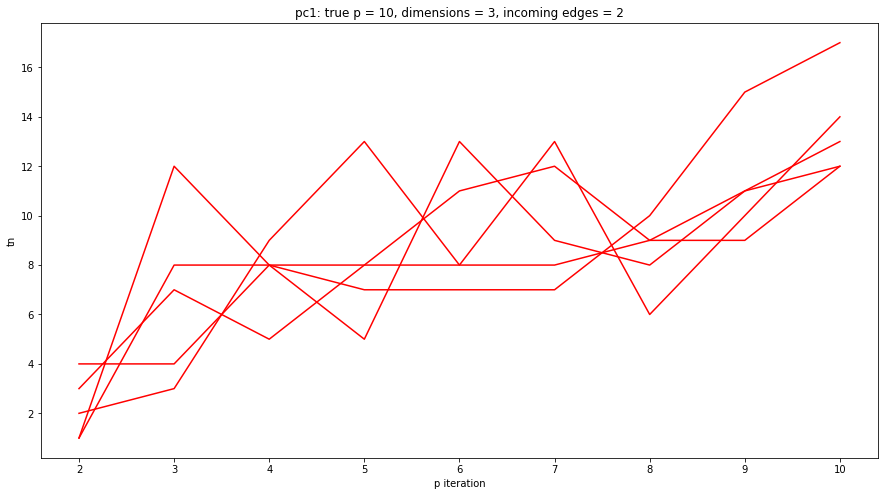

In [95]:
with open('results/edge_deletion.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, visualize, limit, results, title='incrementel', slope=True, delta=False)
                 
with open('results/edge_deletion_extensive.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, visualize, limit, results, title='extensive', slope=True, delta=False)

with open('results/edge_deletion_pc1.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, visualize, limit, results, title='pc1', slope=True, delta=False)

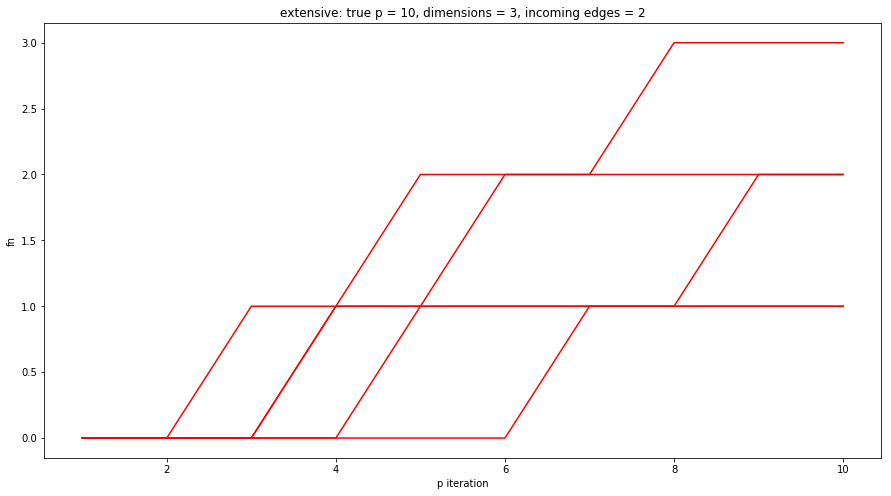

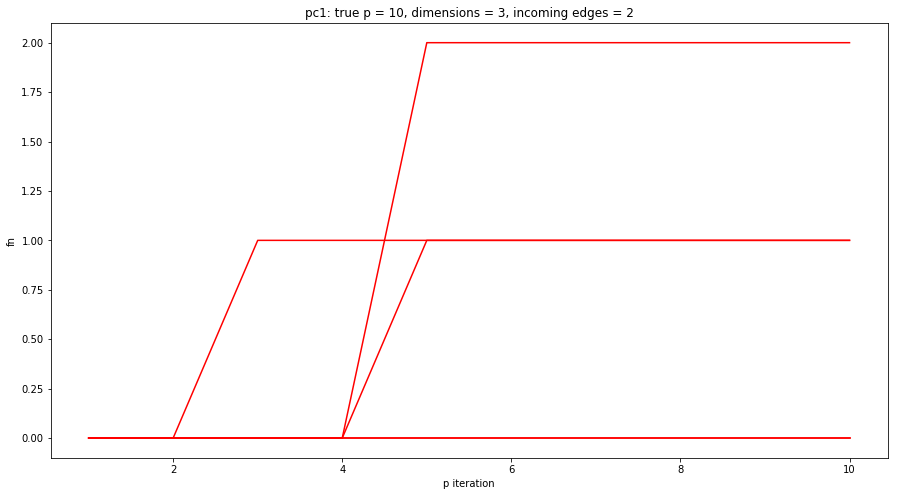

In [96]:
with open('results/edge_deletion_extensive.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, 'fn', limit, results, title='extensive', slope=False, delta=False)

with open('results/edge_deletion_pc1.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, 'fn', limit, results, title='pc1', slope=False, delta=False)

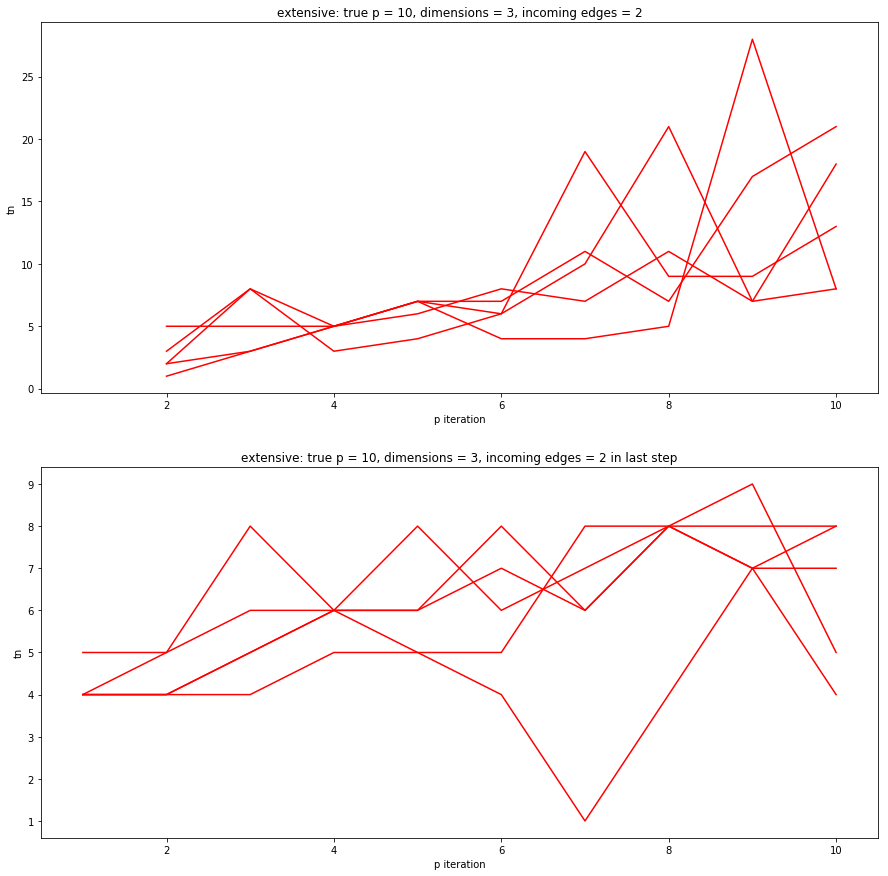

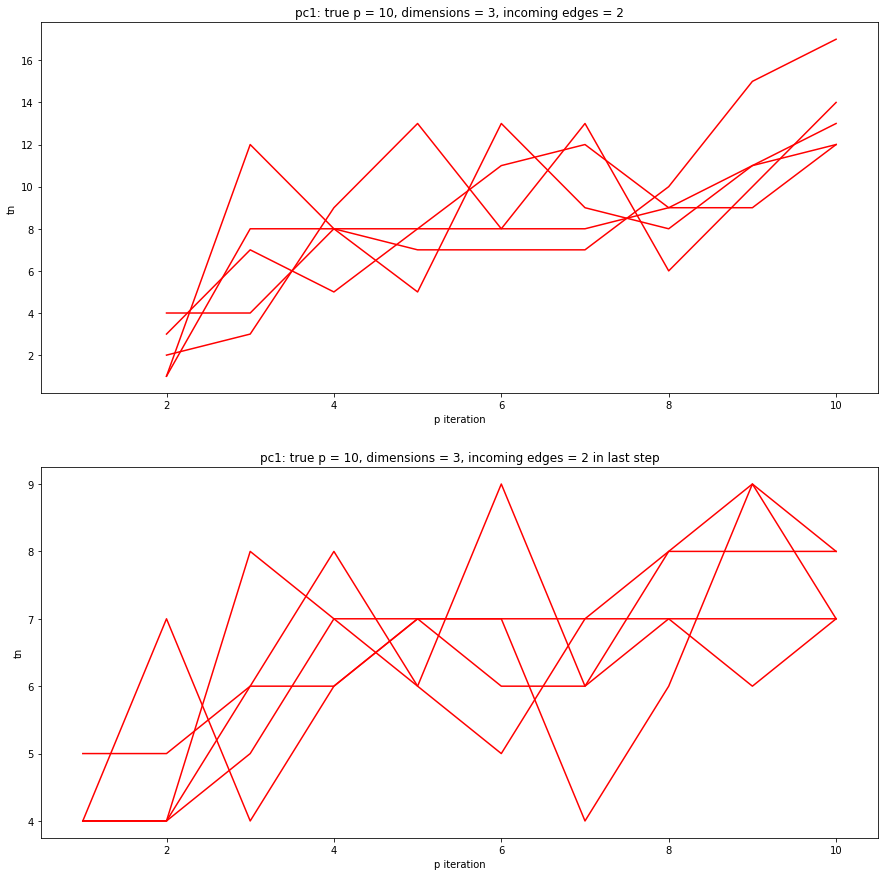

In [97]:
with open('results/edge_deletion_extensive.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, 'tn', limit, results, title='extensive', slope=True, delta=True)

with open('results/edge_deletion_pc1.json', 'r') as f:
    results = json.load(f)
plot_experiments(p, in_edges, dim, 'tn', limit, results, title='pc1', slope=True, delta=True)